<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
print(df.shape)
print(df.dtypes)
print(df.describe())

(65437, 114)
ResponseId               int64
MainBranch                 str
Age                        str
Employment                 str
RemoteWork                 str
                        ...   
JobSatPoints_11        float64
SurveyLength               str
SurveyEase                 str
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

      

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
missing_data = df.isnull()
missing_data.head()

# drop rows with nulls
df_clean = df.dropna(
    subset=[
        'EdLevel',
        'YearsCodePro',
        'JobSat',
        'LanguageHaveWorkedWith',
        'LanguageWantToWorkWith'
    ]
)

df_clean.loc[:, 'RemoteWork'] = df_clean['RemoteWork'].fillna('Unknown') # replace nulls in RemoteWork with unknown

print(df.shape)

(65437, 114)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
print(df_clean['Employment'].value_counts())
print(df_clean['JobSat'].value_counts())
print(df_clean['YearsCodePro'].value_counts())

Employment
Employed, full-time                                                                                                                                                                                                     20752
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 2128
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1168
Employed, part-time                                                                                                                                                                                                       505
Employed, full-time;Student, part-time                                                               

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


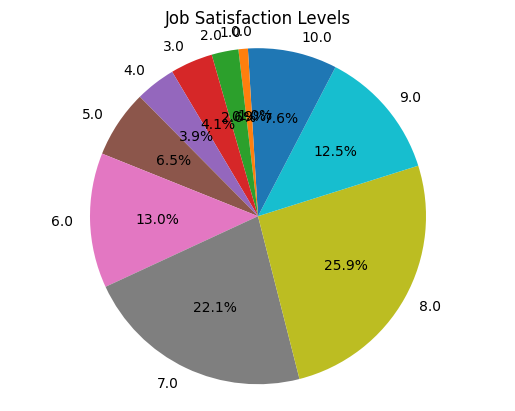

In [6]:
jobsat_counts = df_clean['JobSat'].value_counts().sort_index()

plt.figure()
plt.pie(
    jobsat_counts.values,
    labels=jobsat_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Job Satisfaction Levels')
plt.axis('equal')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


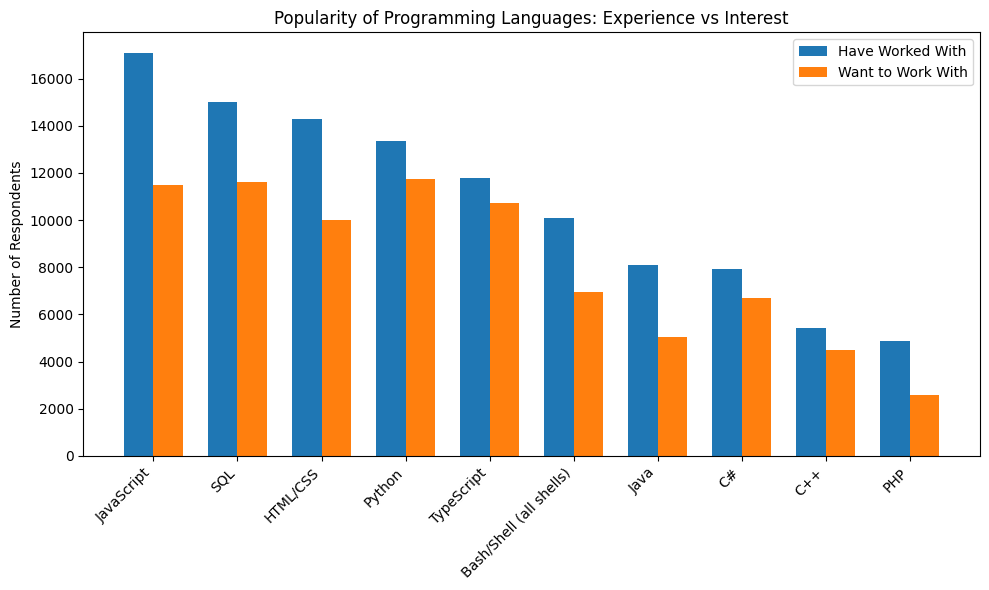

In [7]:
import numpy as np 

df_langs = df_clean[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna(how='all') # drop nulls

df_langs['LanguageHaveWorkedWith'] = df_langs['LanguageHaveWorkedWith'].str.split(';') # split LanguageHaveWorkedWith into list
df_langs['LanguageWantToWorkWith'] = df_langs['LanguageWantToWorkWith'].str.split(';') # split LanguageWantToWorkWith into list

# explode and count LanguageHaveWorkedWith
have_counts = (
    df_langs
    .explode('LanguageHaveWorkedWith')['LanguageHaveWorkedWith']
    .value_counts()
)

# explode and count LanguageWantToWorkWith
want_counts = (
    df_langs
    .explode('LanguageWantToWorkWith')['LanguageWantToWorkWith']
    .value_counts()
)

# bring lists together
language_compare = (
    pd.concat(
        [have_counts, want_counts],
        axis=1,
        keys=['HaveWorkedWith', 'WantToWorkWith']
    )
    .fillna(0)
    .astype(int)
    .head(10)
    .sort_values(by='HaveWorkedWith', ascending=False)
)

# create bar chart
x = np.arange(len(language_compare))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, language_compare['HaveWorkedWith'], width, label='Have Worked With')
plt.bar(x + width/2, language_compare['WantToWorkWith'], width, label='Want to Work With')

plt.xticks(x, language_compare.index, rotation=45, ha='right')
plt.ylabel('Number of Respondents')
plt.title('Popularity of Programming Languages: Experience vs Interest')
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


([<matplotlib.axis.YTick at 0x787b44d2ce60>,
 [Text(0, 0, 'Brazil'),
  Text(0, 1, 'Canada'),
  Text(0, 2, 'France'),
  Text(0, 3, 'Germany'),
  Text(0, 4, 'India'),
  Text(0, 5, 'Netherlands'),
  Text(0, 6, 'Poland'),
  Text(0, 7, 'USA'),
  Text(0, 8, 'Ukraine'),
  Text(0, 9, 'United Kingdom')])

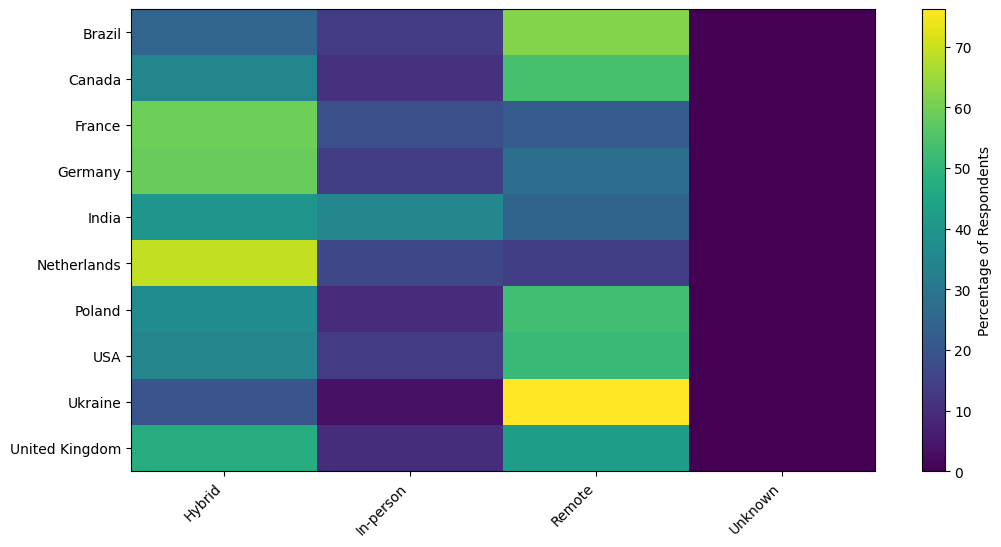

In [8]:
# Top 10 regions count
top_regions = (
    df_clean['Country']
    .value_counts()
    .head(10)
    .index
)

df_country = df_clean[df_clean['Country'].isin(top_regions)]

# rename 'Hybrid (some remote, some in-person)'
df_country['RemoteWork'] = df_clean['RemoteWork'].replace({
    'Hybrid (some remote, some in-person)':
        'Hybrid'
    })

# rename 'United Kingdom of Great Britain and Northern Ireland' and 'United States of America'
df_country['Country'] = df_clean['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland':
        'United Kingdom',
    'United States of America':
        'USA'
})

# create crosstab
remote_country_pct = (
    pd.crosstab(
        df_country['Country'],
        df_country['RemoteWork'],
        normalize='index'
    )
    .mul(100)
    .round(2)
)

# create heatmap
plt.figure(figsize=(12, 6))
plt.imshow(remote_country_pct, aspect='auto')
plt.colorbar(label='Percentage of Respondents')
plt.xticks(
    ticks=range(len(remote_country_pct.columns)),
    labels=remote_country_pct.columns,
    rotation=45,
    ha='right'
)
plt.yticks(
    ticks=range(len(remote_country_pct.index)),
    labels=remote_country_pct.index
)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [9]:
!pip install scipy

from scipy.stats import spearmanr

df_corr = df_clean[['JobSat', 'YearsCodePro']]

# Convert YearsCodePro to numeric
df_corr["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year":
        0,
    "More than 50 years":
        51
})


#Calculate Spearman correlation
spearman_corr = df_corr['JobSat'].corr(
    df_corr['YearsCodePro'],
    method='spearman'
)

print('JobSat and YearscodePro Spearman Correlation:', spearman_corr)

#calculate Pearson correlation
pearson_corr = df_corr['JobSat'].corr(
    df_corr['YearsCodePro'],
    method='pearson'
)

print('JobSat and YearscodePro Pearson Correlation:', pearson_corr)

JobSat and YearscodePro Spearman Correlation: 0.11907122116265983
JobSat and YearscodePro Pearson Correlation: 0.10392714274491938


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


EdLevel_fixed             Associate degree  Bachelors degree  Masters degree  \
Employment                                                                     
Full-Time                             3.09             46.34           29.05   
Part-time                             2.56             34.84           32.28   
Self-Employed/Contractor              2.39             37.58           32.09   
Student                               3.53             37.59           10.58   
Unemployed (Looking)                  0.00             40.00           60.00   

EdLevel_fixed             Professional degree  School  \
Employment                                              
Full-Time                                4.88    4.70   
Part-time                                7.09   10.43   
Self-Employed/Contractor                 4.29    7.95   
Student                                  0.49   25.30   
Unemployed (Looking)                     0.00    0.00   

EdLevel_fixed             Some college/

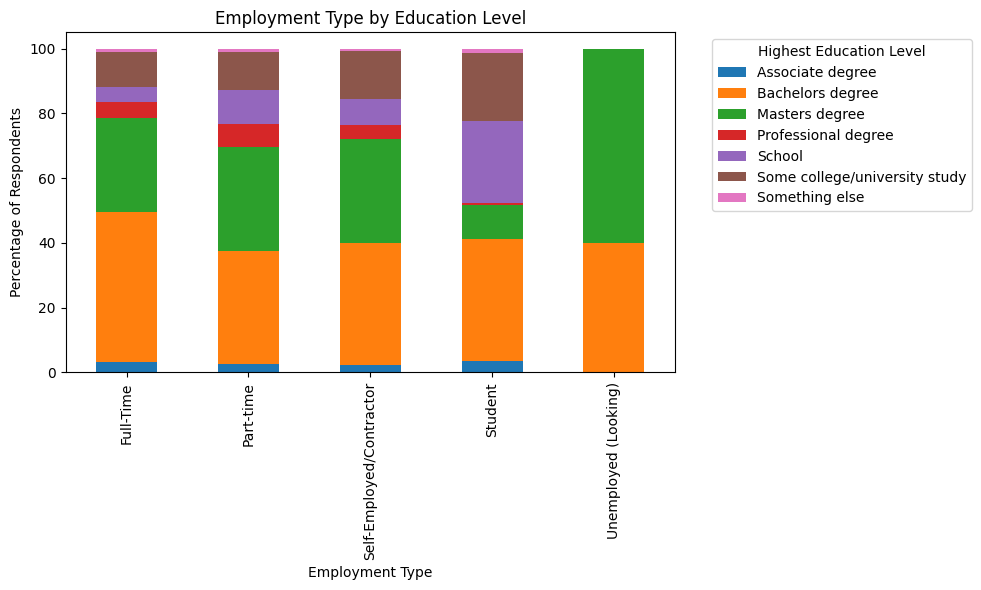

In [10]:
# clean employment type
def clean_employment(text):
    if pd.isna(text):
        return "Unknown"

    text = text.lower()

    if 'employed, full-time' in text:
       return 'Full-Time'
    elif 'student' in text:
        return 'Student'
    elif 'independent contractor' in text or 'freelancer' in text:
        return 'Self-Employed/Contractor'
    elif 'not employed, but looking' in text:
        return 'Unemployed (Looking)'
    elif 'employed, part-time' in text:
        return 'Part-time'
    elif 'retired' in text:
        return 'Retired'
    else:
        return 'Other'

df_clean['Employment'] = df_clean['Employment'].apply(clean_employment)

# rename EdLevel
df_clean['EdLevel_fixed'] = df_clean['EdLevel'].replace({
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        'School',
    'Primary/elementary school':
        'School',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        'Bachelors degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        'Masters degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':
        'Professional degree',
    'Associate degree (A.A., A.S., etc.)':
        'Associate degree',
    'Some college/university study without earning a degree':
        'Some college/university study'
})

employment = (df_clean['Employment']
              .value_counts()
              .head(20)
              .index
)

df_top = df_clean[df_clean['Employment'].isin(employment)]

# crosstab of Employment and EdLevel
employment_ed_pct = (
    pd.crosstab(
        df_top['Employment'],
        df_top['EdLevel_fixed'],
        normalize='index'
    )
    .mul(100)
    .round(2)
)

print(employment_ed_pct)

# create stacked bar chart
employment_ed_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.xlabel('Employment Type')
plt.ylabel('Percentage of Respondents')
plt.title('Employment Type by Education Level')
plt.legend(title='Highest Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [11]:
df.to_csv('modified_survey_data_v2.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
